## <font color=darkblue> NETWORK WITH TWO HIDDEN LAYERS

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import vnns

<font color=darkblue> On the remaining six datasets, the strategy will be just the same as in the previous notebook with the exception that we now set num_hidden_layers = 2 (two hidden layers) and total_units_max = 20 (we cannot have more than 20 units total on those two hidden layers.) Note that this means in each layer we cannot have more than 10 units since for hidden_units = 'auto', our code imposes the same number of units for each layer (a selection that does not have a theoretical foundation but rather based on rather random evaluations confirming its effectiveness.) Maximum 10 units per layer selection is also equally arbitrary. Let's plot the training set decision boundary and display the summary table for each remaining dataset as we did in earlier notebooks:



*** Data: elliptic1 ***


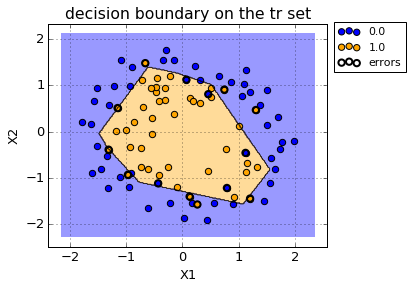

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic1,True,GD,1078,1.277197,1,"[3, 3]",0.03,0.853,0.696




*** Data: elliptic2 ***


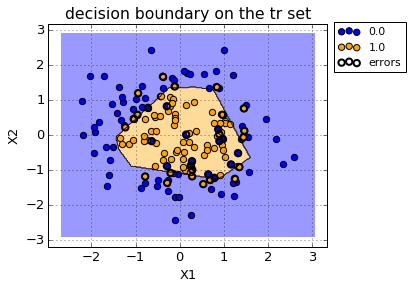

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,elliptic2,True,GD,313,0.436206,1,"[3, 3]",1.0,0.783,0.821




*** Data: complex2 ***


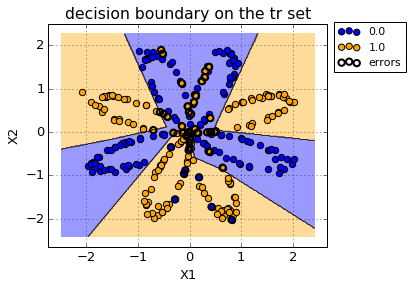

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex2,True,GD,2535,3.177239,1,"[4, 4]",0.1,0.854,0.785




*** Data: complex3 ***


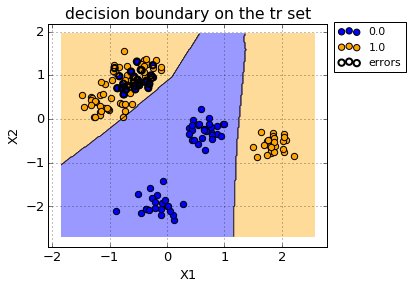

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex3,True,GD,713,0.906247,1,"[5, 5]",3.0,0.832,0.795




*** Data: complex4 ***


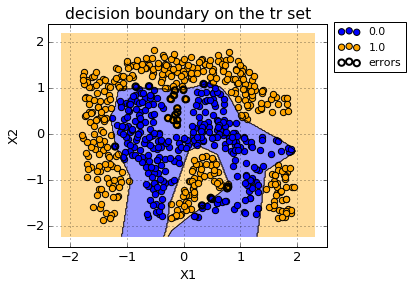

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex4,True,GD,5596,9.731442,1,"[9, 9]",0.3,0.97,0.93




*** Data: multiclass3 ***


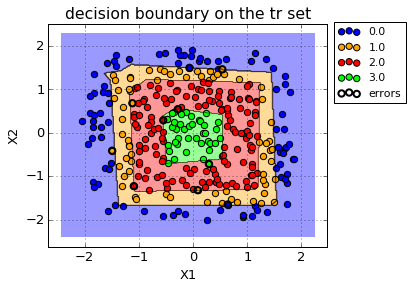

,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,multiclass3,True,GD,8418,11.505514,1,"[5, 5]",0.3,0.97,0.852


In [3]:
for data in ['elliptic1','elliptic2','complex2','complex3','complex4','multiclass3']:
    print("\n\n*** Data:", data, "***")
    dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\"+data+"_tr.csv", 
                             normalize = True, 
                             polydeg = 1,
                             method = 'GD',                             
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 'auto',
                             maxiter = 10000, 
                             hidden_units = 'auto',
                             num_hidden_layers = 2, 
                             total_units_max = 20,  
                             plot_output = True)
    summary = dla.generate_summary()
    display(summary)

<font color=darkblue> The use of two hidden layers allows two more datasets (which had failed with no or a single hidden layer) to pass the threshold of 1.8 for training and test scores combined: complex4 and multiclass3. Below, we run once again those files by setting the plotting/reporting options to True. On the other hand note that the remaining datasets except complex3 showed improvement versus single hidden layer case although they still were not able to meet the success criterion. 



*** Data: complex1 ***


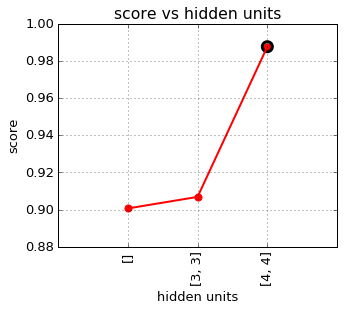

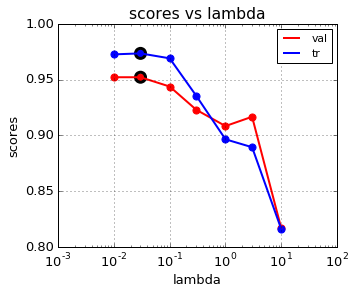

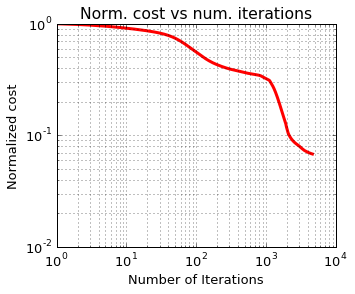


data:
	file: Data\Medium\complex1_tr.csv
	m = 161 training examples
	n = 2 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 80
	number of samples in class 1 = 81
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 4, 4, 1]
	regularization: yes (lambda = 0.03)
	method: GD
	learning rate = 0.081
output:
	* Converged
	initial cost = 0.347205435614
	final cost = 0.0236330803551
	number of iterations = 4632
	accuracy on the training set: 0.988
	execution time:  4.700181  sec


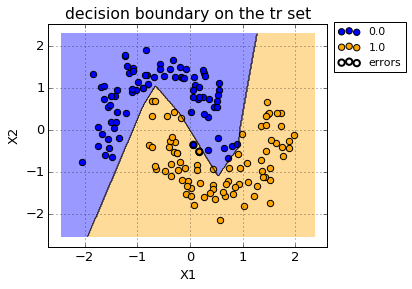

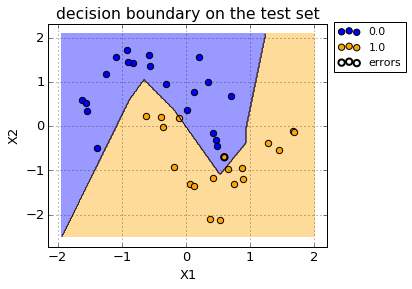



*** Data: complex4 ***


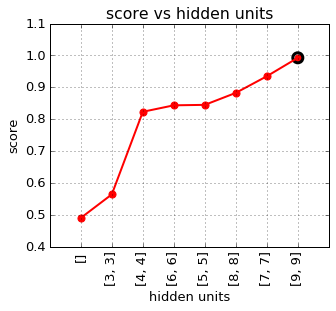

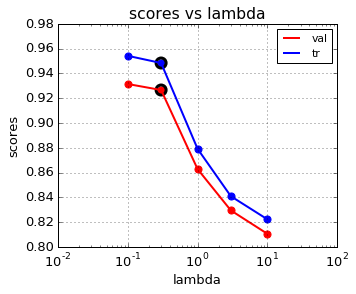

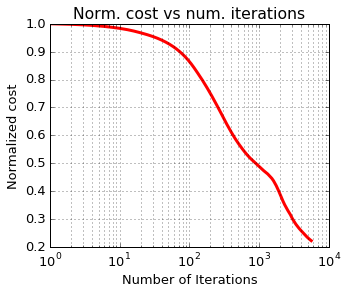


data:
	file: Data\Medium\complex4_tr.csv
	m = 691 training examples
	n = 2 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 301
	number of samples in class 1 = 390
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 9, 9, 1]
	regularization: yes (lambda = 0.3)
	method: GD
	learning rate = 0.081
output:
	* Converged
	initial cost = 0.290664232873
	final cost = 0.0646952171412
	number of iterations = 5596
	accuracy on the training set: 0.97
	execution time:  7.483598  sec


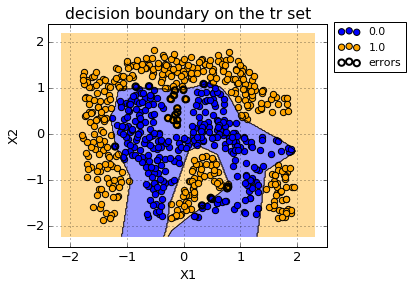

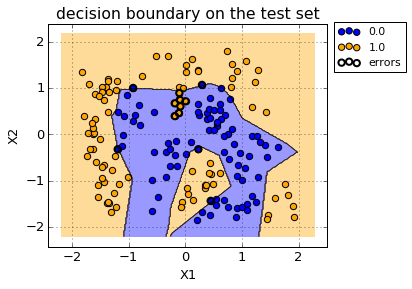



*** Data: multiclass3 ***


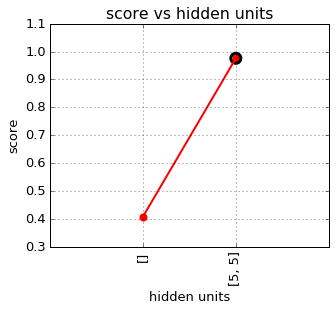

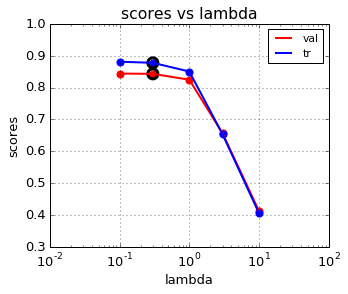

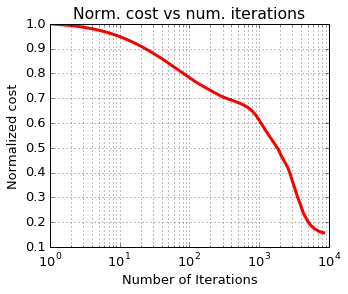


data:
	file: Data\Medium\multiclass3_tr.csv
	m = 329 training examples
	n = 2 features
	original classes: [0.0, 1.0, 2.0, 3.0]
	number of samples in class 0 = 87
	number of samples in class 1 = 68
	number of samples in class 2 = 134
	number of samples in class 3 = 40
solver:
	feature normalization: yes
	polynomial regression: no
	neural network config: [2, 5, 5, 4]
	regularization: yes (lambda = 0.3)
	method: GD
	learning rate = 0.0243
output:
	* Converged
	initial cost = 1.30993797758
	final cost = 0.205963299724
	number of iterations = 8418
	accuracy on the training set: 0.97
	execution time:  10.999024  sec


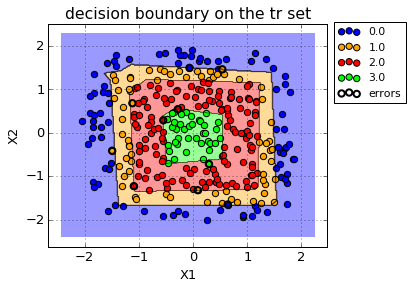

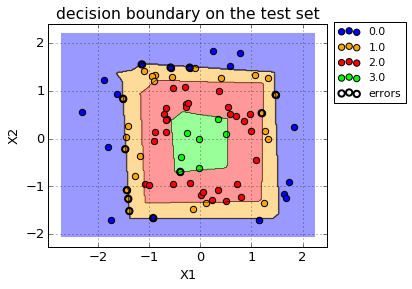



*** Summary ***


,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,complex1,True,GD,4632,4.700181,1,"[4, 4]",0.03,0.988,0.974
1,complex4,True,GD,5596,7.483598,1,"[9, 9]",0.3,0.97,0.93
2,multiclass3,True,GD,8418,10.999024,1,"[5, 5]",0.3,0.97,0.852


In [4]:
scoreboard = pd.DataFrame()
for data in ['complex1','complex4','multiclass3']:
    print("\n\n*** Data:", data, "***")
    dla = vnns.DeepLearnAuto(datafile = "Data\\Medium\\"+data+"_tr.csv", 
                             normalize = True,
                             polydeg = 1,
                             method = 'GD',                             
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 'auto',
                             maxiter = 10000, 
                             hidden_units = 'auto',
                             num_hidden_layers = 2, 
                             total_units_max = 20, 
                             plot_J = True, 
                             report_summary = True, 
                             plot_output = True,
                             plot_test = True,
                             plot_hidden = True,
                             plot_lam = True)
    summary = dla.generate_summary()
    scoreboard = scoreboard.append(summary,ignore_index=True)
print ("\n\n*** Summary ***")
display(scoreboard)

<font color=darkblue> In the next notebook we will proceed with networks featuring three hidden layers in an attempt to further improve the training and test scores. 